# Linear Regression

## Create dataset

In [1]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

# Gradient Descent


In [10]:
import numpy as np

def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Initialize random weights
    cost_history = []
    
    for epoch in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (2/m) * X.T.dot(error)
        theta -= learning_rate * gradients
        
        # Compute the cost function (Mean Squared Error)
        cost = (1/m) * np.sum(error ** 2)
        cost_history.append(cost)
    
    return theta, cost_history


#### Notes
m = len(y):
What it does: This line calculates the number of samples or data points in the dataset.

Explanation: The variable y is the vector of the target values (the actual output or dependent variable). len(y) gives the number of entries in y, which is the same as the number of rows in X, the input matrix. This is important because many calculations in gradient descent (such as the mean squared error or gradient) involve dividing by the number of samples (m).

Example: If you have 100 data points, m would be 100.

2. theta = np.random.randn(X.shape[1], 1):
What it does: This line initializes the model parameters (weights), theta, to small random values.

Explanation:

X.shape[1] refers to the number of features (or columns) in the input matrix X. For example, if you have two input features (e.g., age and income), X.shape[1] would return 2.
np.random.randn(X.shape[1], 1) generates random numbers from a standard normal distribution with the shape (number of features, 1). The parameters are initialized randomly because this allows gradient descent to start with different values and find the optimal solution by minimizing the cost function.
Example: If your input matrix X has 2 features, theta will be initialized as a 2x1 column vector with random values.

3. cost_history = []:
What it does: This line initializes an empty list to store the cost values at each epoch.

Explanation: The cost function measures how well the model's predictions match the actual data. By storing the cost at each step, we can monitor the progress of the gradient descent algorithm and ensure it is converging to a good solution.

4. for epoch in range(epochs):
What it does: This line starts a loop that will iterate over the number of epochs specified by the user.
Example: If epochs is set to 1000, the loop will run 1000 times, updating the model parameters and cost at each step.


## Batch Gradient Descent

In [11]:
from sklearn.preprocessing import add_dummy_feature

eta = 0.1  # learning rate
n_epochs = 1000
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    #print(epoch, gradients, theta)

The trained model parameters:

In [12]:
theta

array([[3.56401543],
       [0.84362064]])

C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:19: RuntimeWarning: overflow encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:19: RuntimeWarning: invalid value encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:20: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


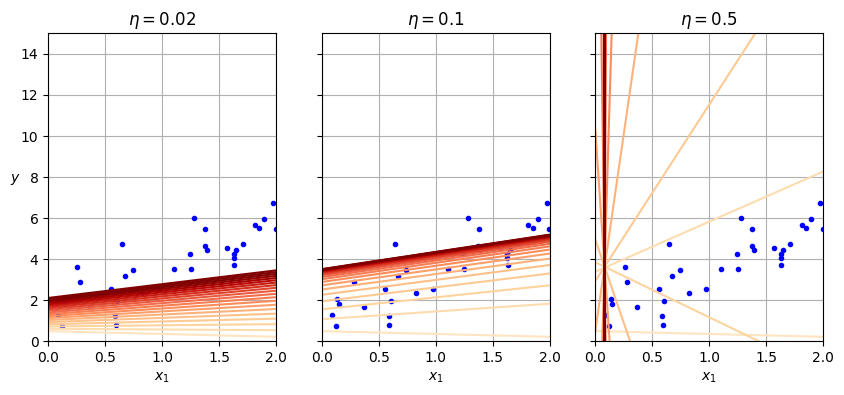

In [13]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl
import numpy as np

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate new x values
    X_new_b = add_dummy_feature(X_new)  # Add bias term to new x values
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
#save_fig("gradient_descent_plot")
plt.show()

# WEEKLY TASK 
Part 1

Thought Process: 
From reading the first task, it is noted that we are asked to continue the learning process until a good solution is found. So first I think we should have a way to determine when the model gets the lowest/global minimum cost maybe with a loop checking through the run after all iterations/epochs have happened then finds the best model configuration. If none is found then the system, should update the number of epochs/keep updating the number of epochs/should continue running until we get the lowest cost. In the function we should also aim to save the best models maybe in two folders if an iteration happens and then we get a minimum but it's a local minimum or just a minimum but not global minimum then it's saved in a separate folder. and for the global minimum it's saved in a separate folder; that is the configurations.


Great! We’ll go with the following approach:

- **Threshold**: We’ll use a **very small change** (like `1e-6`) in the cost between consecutive epochs as our stopping criterion.
- Additionally, we’ll implement logic to check if the gradient becomes positive after detecting a low cost (which may signal convergence).
- **JSON** format: We’ll save model configurations (parameters and cost) in **JSON files**—one for local minima and one for global minima.

Now let’s proceed step by step:

### Pseudo-code for what we’ll implement:
1. **Initialization**:
   - Start with small epochs (e.g., 100).
   - Initialize model parameters randomly.

2. **Loop** (Adaptive Epochs):
   - Run Batch Gradient Descent.
   - Compute the cost and check the gradient.
   - If the cost stops decreasing or the gradient turns positive after detecting a consistent low cost, stop training.
   - Continue adding epochs until a global minimum is detected.

3. **Save Model**:
   - Save configurations (cost, parameters) in JSON format.
   - Save local minima and global minima in separate files.


### Breakdown of the Code:
1. **Adaptive Epochs**: We start with a small number of epochs (100) and keep increasing it by 50 in each loop until a global minimum is found or convergence is detected.
2. **Saving Models**: 
   - The model configuration (cost, parameters) is saved in **JSON files**.
   - Local minima are saved in one folder (`models/local_min/`), and global minima are saved in another (`models/global_min/`).
3. **Convergence Criteria**:
   - We stop training if the **change in cost** is smaller than the threshold (`1e-6`).
   - If the gradient becomes positive after multiple epochs, the training stops as well, assuming the algorithm is oscillating or stuck.


Part 2
Key Idea:
When the learning rate is too high, the algorithm may overshoot the minimum, causing the cost function to increase rather than decrease consistently. This can lead to oscillations or divergence.

Strategy:
Check for Oscillations: Monitor if the cost function increases significantly from one epoch to the next. If this happens repeatedly, it's a sign that the learning rate may be too high.

Implementation Plan:
Monitor the Cost Function: Keep track of the cost function values over epochs.
Detect Rapid Cost Increase: If the cost increases by more than a certain threshold (e.g., 10% compared to the previous epoch), increment an oscillation counter.
Stop Training Early: If oscillations are detected multiple times (e.g., 3 times), raise a warning and stop the training.





Epoch 1, Cost: 436.6763734524583
Oscillation detected at epoch 2: cost increased by more than 10%
Epoch 2, Cost: 4270.614403456512
Oscillation detected at epoch 3: cost increased by more than 10%
Epoch 3, Cost: 41832.93761056619
Oscillation detected at epoch 4: cost increased by more than 10%
Total epochs run: 4


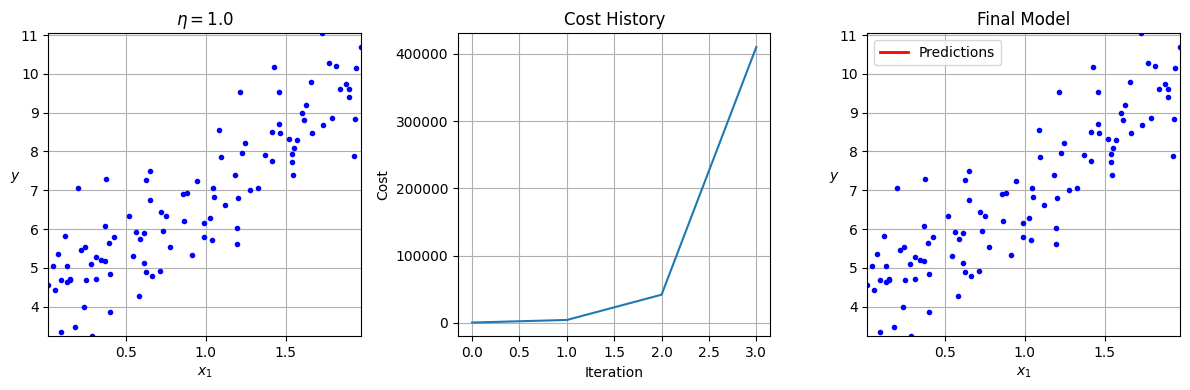

In [32]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import add_dummy_feature

def batch_gradient_descent_adaptive(X, y, eta=0.1, initial_epochs=100, threshold=1e-6, max_epochs=10000):
    X_b = add_dummy_feature(X)  # Add x0 = 1 to each instance
    m = len(X_b)  # Number of instances
    
    np.random.seed(42)
    theta = np.random.randn(X_b.shape[1], 1)  # Randomly initialized model parameters
    
    cost_history = []
    theta_path = []
    global_minimum = None
    local_minima = []
    total_epochs = 0
    epochs = initial_epochs
    
    # Variables for detecting high learning rate
    oscillation_count = 0
    max_oscillations = 3  # Number of oscillations before detecting a high learning rate
    prev_cost = float('inf')
    cost_increase_threshold = 0.1  # 10% increase in cost
    
    # Create directories to save models
    os.makedirs('models/global_min', exist_ok=True)
    os.makedirs('models/local_min', exist_ok=True)
    
    while total_epochs < max_epochs:
        converged = False  # Flag to check if convergence occurred in this batch
        for epoch in range(epochs):
            gradients = 2 / m * X_b.T @ (X_b @ theta - y)
            theta = theta - eta * gradients
            theta_path.append(theta.copy())
            
            # Compute the cost function (Mean Squared Error)
            cost = (1 / m) * np.sum((X_b @ theta - y) ** 2)
            cost_history.append(cost)
            
            # Check if cost change is below the threshold
            if abs(prev_cost - cost) < threshold:
                converged = True
                print(f"Converged at epoch {total_epochs + epoch + 1}")
                break  # Stop training as change in cost is too small
            
            # Check for oscillations (cost increasing significantly)
            if cost > prev_cost * (1 + cost_increase_threshold):
                oscillation_count += 1
                print(f"Oscillation detected at epoch {total_epochs + epoch + 1}: cost increased by more than 10%")
                if oscillation_count >= max_oscillations:
                    print(f"Warning: Learning rate {eta} may be too high. Oscillations detected {oscillation_count} times.")
                    converged = True  # Stop training due to oscillations
                    break
            else:
                # Reset oscillation count if cost is decreasing
                oscillation_count = 0

            prev_cost = cost
            
            print(f"Epoch {total_epochs + epoch + 1}, Cost: {cost}")
        
        total_epochs += (epoch + 1)
        
        # Check for a local or global minimum
        if global_minimum is None or cost < global_minimum['cost']:
            global_minimum = {'epoch': total_epochs, 'cost': cost, 'theta': theta.tolist()}
            # Save global minimum model
            with open(f'models/global_min/global_model_epoch_{total_epochs}.json', 'w') as f:
                json.dump(global_minimum, f)
        else:
            # Save local minima when cost improves but is not the lowest seen
            local_minima.append({'epoch': total_epochs, 'cost': cost, 'theta': theta.tolist()})
            with open(f'models/local_min/local_model_epoch_{total_epochs}.json', 'w') as f:
                json.dump(local_minima[-1], f)
        
        if converged:
            break  # Exit the while loop if convergence or oscillations were reached
        
        # Reset prev_cost for the next batch
        prev_cost = float('inf')
    
    print(f"Total epochs run: {total_epochs}")
    return theta, cost_history, theta_path, global_minimum, local_minima

def plot_gradient_descent_adaptive(X, y, eta):
    theta, cost_history, theta_path, global_minimum, local_minima = batch_gradient_descent_adaptive(X, y, eta)
    
    X_b = add_dummy_feature(X)
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Gradient Descent Path
    plt.subplot(131)
    plt.plot(X, y, "b.")
    X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_new_b = add_dummy_feature(X_new)
    n_shown = min(20, len(theta_path))
    for i, theta_i in enumerate(theta_path[:n_shown]):
        y_predict = X_new_b @ theta_i
        color = mpl.colors.rgb2hex(plt.cm.OrRd(i / n_shown + 0.15))
        plt.plot(X_new, y_predict, linestyle="solid", color=color)
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([X.min(), X.max(), y.min(), y.max()])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    
    # Plot 2: Cost History
    plt.subplot(132)
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost History")
    plt.grid()
    
    # Plot 3: Final Model
    plt.subplot(133)
    plt.plot(X, y, "b.")
    y_predict = X_new_b @ theta
    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([X.min(), X.max(), y.min(), y.max()])
    plt.grid()
    plt.title("Final Model")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return theta, global_minimum, local_minima

# Usage
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Appropriate Learning Rate (eta = 0.1)
theta, global_minimum, local_minima = plot_gradient_descent_adaptive(X, y, eta=0.1)

# Testing with High Learning Rate (eta = 1.0)
# theta, global_minimum, local_minima = plot_gradient_descent_adaptive(X, y, eta=1.0)